In [ ]:
#METHOD 1

# STEP 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Download stock data
data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")


[*********************100%***********************]  1 of 1 completed


In [ ]:

# Select relevant features
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data.loc[:, 'Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [ ]:
#  STEP 4: Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `scaled_data` is a NumPy array and the last column is the target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)


In [ ]:
#  STEP 6: Build ANN Model
from tensorflow.keras.layers import Input # Import the Input layer

model = Sequential([
    Input(shape=(5,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

# STEP 7: Train the Model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)


Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0035
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9631e-05
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3971e-05
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3314e-05
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1327e-05
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0602e-05
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0603e-05
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1870e-05
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1105e-05
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0891e-05
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1887e-05
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1115e-05
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2778e-05
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1445e-05
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━

In [ ]:
# STEP 8: Predicting
y_pred_scaled = model.predict(X_test).flatten()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
target_scaler = MinMaxScaler()
target_scaler.fit(data[['Target']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# 📏 STEP 10: Evaluation
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)
accuracy = 100 - (mae / np.mean(y_actual)) * 100

print("\n Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Approximate Prediction Accuracy: {accuracy:.2f}%")


 Model Evaluation Metrics:
Mean Absolute Error (MAE): 16.06
Root Mean Squared Error (RMSE): 18.74
R² Score: 0.7897
Approximate Prediction Accuracy: 87.59%


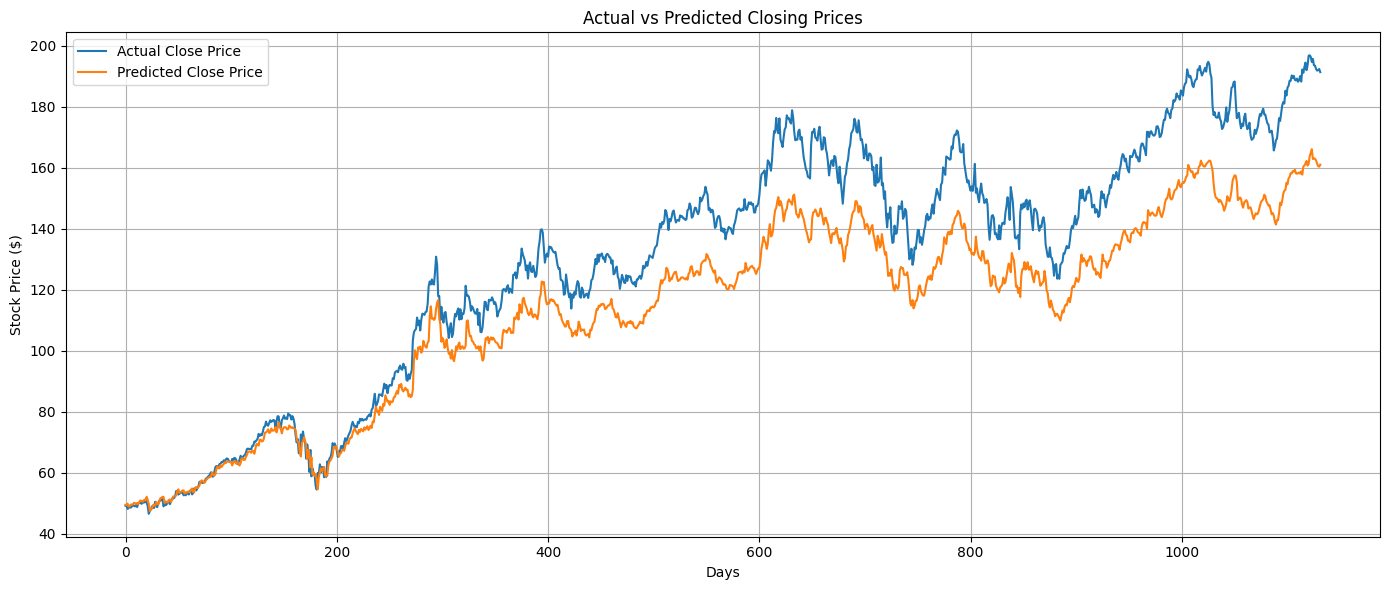

In [ ]:
#  STEP 11: Visualization

# Plot 1: Actual vs Predicted Prices
plt.figure(figsize=(14,6))
plt.plot(y_actual, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


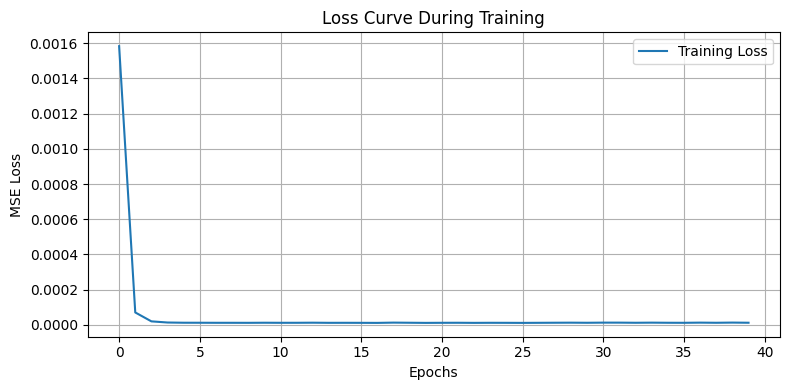

In [ ]:
# Plot 2: Training Loss Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Method 2


from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


importances = rf.feature_importances_
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']


feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feature_importances_df)


  Feature  Importance
3   Close    0.510354
1    High    0.186392
2     Low    0.166171
0    Open    0.136876
4  Volume    0.000207


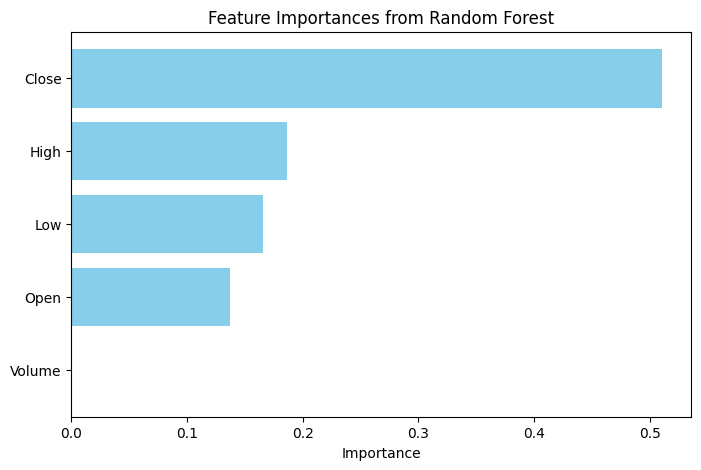

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# STEP 1: Select Only Important Features
selected_features = ['Close', 'High', 'Low']
target_column = 'Target'

# STEP 2: Scale Features and Target
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[selected_features + [target_column]])

# STEP 3: Split Features and Target
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# STEP 5: Build ANN Model (Input shape = 3)
model = Sequential([
    Input(shape=(3,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')

# STEP 6: Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# STEP 7: Predict
y_pred_scaled = model.predict(X_test).flatten()

# STEP 8: Inverse Transform
target_scaler = MinMaxScaler()
target_scaler.fit(data[['Target']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4870e-05
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3832e-05
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2990e-05
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8159e-05
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4463e-05
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5393e-05
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3656e-05
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3798e-05
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1844e-05
Epoch 11/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1814e-05
Epoch 12/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4825e-05
Epoch 13/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5508e-05
Epoch 14/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4014e-05
Epoch 15/30
50/50 ━━━━━━━━━━━━━━━


Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.17
Root Mean Squared Error (RMSE): 2.82
R² Score: 0.9773
Approximate Prediction Accuracy: 98.62%


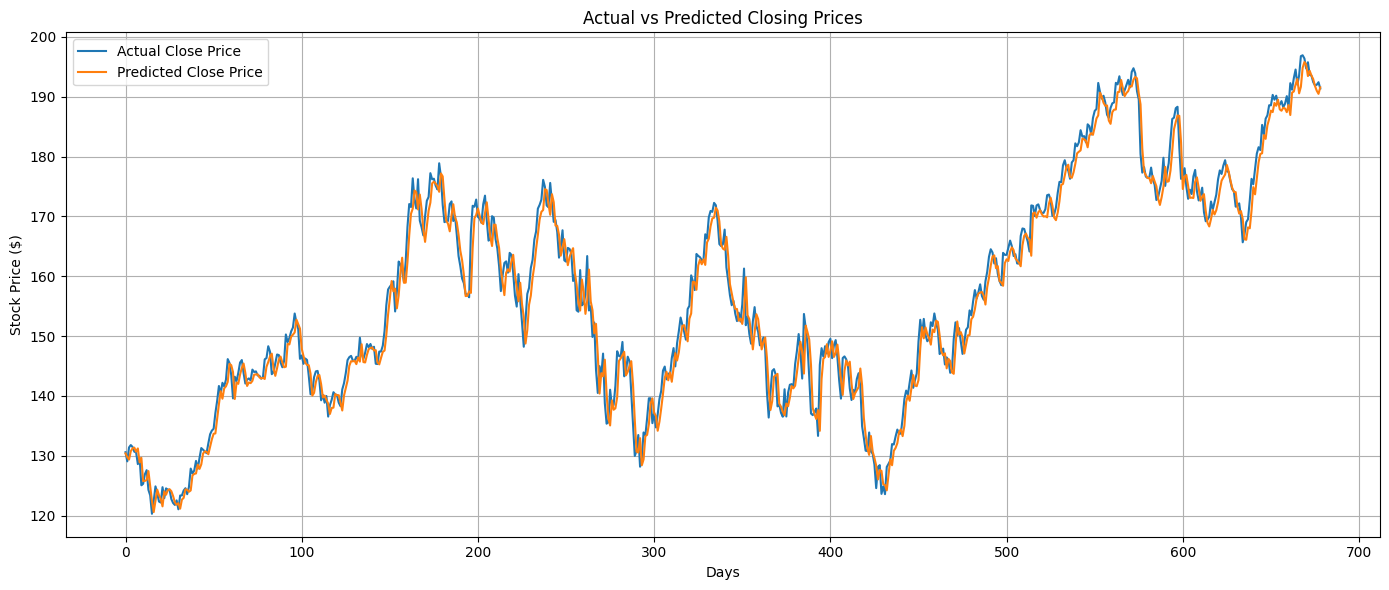

In [ ]:

# STEP 9: Evaluation
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)
accuracy = 100 - (mae / np.mean(y_actual)) * 100

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Approximate Prediction Accuracy: {accuracy:.2f}%")
plt.figure(figsize=(14, 6))
plt.plot(y_actual, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
